In [1]:
import pandas as pd

from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler

# from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#mount google drive

from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/"

combinedDf = pd.read_csv(path + 'Combined.csv')

<ipython-input-3-17aea7ac84aa>:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  combinedDf = pd.read_csv(path + 'Combined.csv')


In [4]:
# Info of the data
combinedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 52 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1215890 non-null  int64  
 1   Seq          1215890 non-null  int64  
 2   Dur          1215890 non-null  float64
 3   RunTime      1215890 non-null  float64
 4   Mean         1215890 non-null  float64
 5   Sum          1215890 non-null  float64
 6   Min          1215890 non-null  float64
 7   Max          1215890 non-null  float64
 8   Proto        1215890 non-null  object 
 9   sTos         1215676 non-null  float64
 10  dTos         272823 non-null   float64
 11  sDSb         1215676 non-null  object 
 12  dDSb         272823 non-null   object 
 13  sTtl         1215676 non-null  float64
 14  dTtl         272823 non-null   float64
 15  sHops        1215676 non-null  float64
 16  dHops        272823 non-null   float64
 17  Cause        1215890 non-null  object 
 18  To

In [5]:
# Number of rows
combinedDf.shape[0]


object_columns =  combinedDf.select_dtypes(include=[object]).columns
float_columns = combinedDf.select_dtypes(include=[float]).columns
int_columns = combinedDf.select_dtypes(include=[int]).columns

In [6]:
columns_null = []
columns = combinedDf.columns
for column in columns:
    c = combinedDf[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

sTos has 214 null values
dTos has 943067 null values
sDSb has 214 null values
dDSb has 943067 null values
sTtl has 214 null values
dTtl has 943067 null values
sHops has 214 null values
dHops has 943067 null values
SrcGap has 937219 null values
DstGap has 937219 null values
SrcWin has 973470 null values
DstWin has 1038812 null values
sVid has 1101319 null values
dVid has 1213881 null values
SrcTCPBase has 937219 null values
DstTCPBase has 985843 null values


In [7]:
columnsWithMoreSingularValues = []

# Iterate through each column in the DataFrame
for column in combinedDf.columns:
    # Calculate the percentage of occurrences of the most frequent value
    dominant_value_percentage = combinedDf[column].value_counts(normalize=True).max() * 100

    # Check if the percentage exceeds 80%
    if dominant_value_percentage > 80:
        columnsWithMoreSingularValues.append(column)
        print(f"Column '{column}' has a dominant value occupying more than 80%.")

Column 'sTos' has a dominant value occupying more than 80%.
Column 'dTos' has a dominant value occupying more than 80%.
Column 'sDSb' has a dominant value occupying more than 80%.
Column 'dDSb' has a dominant value occupying more than 80%.
Column 'sTtl' has a dominant value occupying more than 80%.
Column 'dTtl' has a dominant value occupying more than 80%.
Column 'sHops' has a dominant value occupying more than 80%.
Column 'dHops' has a dominant value occupying more than 80%.
Column 'DstLoad' has a dominant value occupying more than 80%.
Column 'Loss' has a dominant value occupying more than 80%.
Column 'SrcLoss' has a dominant value occupying more than 80%.
Column 'DstLoss' has a dominant value occupying more than 80%.
Column 'pLoss' has a dominant value occupying more than 80%.
Column 'SrcGap' has a dominant value occupying more than 80%.
Column 'DstGap' has a dominant value occupying more than 80%.
Column 'DstRate' has a dominant value occupying more than 80%.
Column 'sVid' has a d

In [8]:



selected_features = []

for column in combinedDf.columns:
    if combinedDf[column].dtype in ['int64', 'float64']:
      # Perform one-way ANOVA
      f_statistic, p_value = f_oneway(*[group[column] for name, group in combinedDf.groupby('Label')])

      if p_value < 0.05:
          selected_features.append(column)

# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['Unnamed: 0', 'Seq', 'Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Rate', 'SrcRate', 'DstRate', 'TcpRtt', 'SynAck', 'AckDat']


In [9]:
remaining_features = [featureName for featureName in selected_features if featureName not in columnsWithMoreSingularValues]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
combinedDf[remaining_features] = scaler.fit_transform(combinedDf[remaining_features])

In [10]:
remaining_features.append('Label')
remaining_features.append('Attack Type')
remaining_features.append('Attack Tool')
print(remaining_features)
print(len(remaining_features))

['Unnamed: 0', 'Seq', 'Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'Rate', 'SrcRate', 'Label', 'Attack Type', 'Attack Tool']
24


In [11]:
# These columns are selected based on the ANOVA F scores and the null values and Removing columns which has dominant singular values and the understanding of the features computed for binary and multi level classification

combinedDf = combinedDf[remaining_features]


In [12]:
columns_null = []
columns = combinedDf.columns
for column in columns:
    c = combinedDf[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

In [13]:
file_path_drive = '/content/drive/My Drive/updated_Combined.csv'

# Write DataFrame to a CSV file
combinedDf.to_csv(file_path_drive, index=False)

In [14]:
# Step 1: Summary Statistics
summary_stats = combinedDf.describe()
print(summary_stats)



         Unnamed: 0           Seq           Dur       RunTime          Mean  \
count  1.215890e+06  1.215890e+06  1.215890e+06  1.215890e+06  1.215890e+06   
mean   3.590435e-17 -3.590435e-17 -2.619896e-16 -2.619896e-16 -2.619896e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.622560e+00 -1.068049e+00 -8.069802e-01 -8.069802e-01 -8.069802e-01   
25%   -8.418846e-01 -8.334835e-01 -8.069802e-01 -8.069802e-01 -8.069802e-01   
50%   -6.120916e-02 -3.473562e-01 -8.069802e-01 -8.069802e-01 -8.069802e-01   
75%    7.194663e-01  6.081930e-01  7.187150e-01  7.187150e-01  7.187150e-01   
max    2.118427e+00  2.564510e+00  1.097136e+01  1.097136e+01  1.097136e+01   

                Sum           Min           Max       TotPkts       SrcPkts  \
count  1.215890e+06  1.215890e+06  1.215890e+06  1.215890e+06  1.215890e+06   
mean  -2.619896e-16 -2.619896e-16 -2.619896e-16  1.683017e-17  2.374923e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

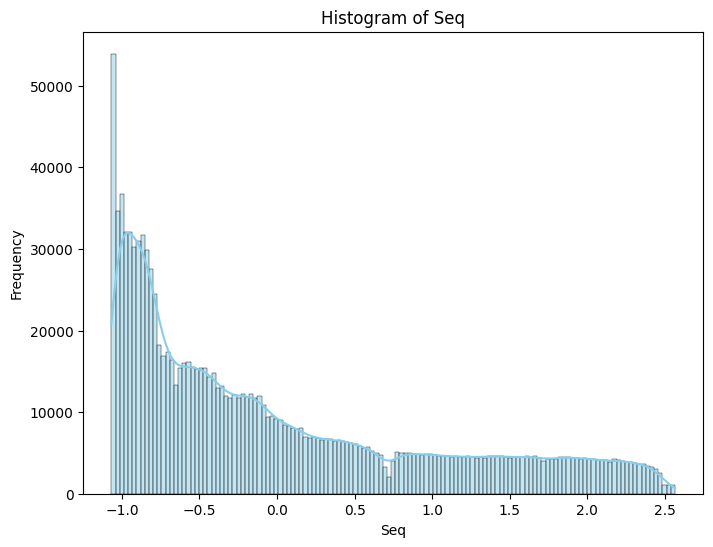

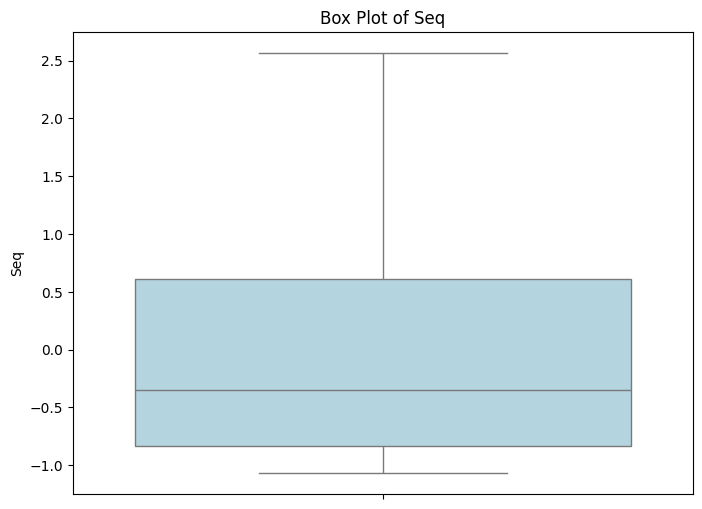

In [15]:
# Histogram and Density Plot for a single numerical feature
feature = 'Seq'
plt.figure(figsize=(8, 6))
sns.histplot(combinedDf[feature], kde=True, color='skyblue')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Box Plot for a single numerical feature
plt.figure(figsize=(8, 6))
sns.boxplot(y=combinedDf[feature], color='lightblue')
plt.title(f'Box Plot of {feature}')
plt.ylabel(feature)
plt.show()

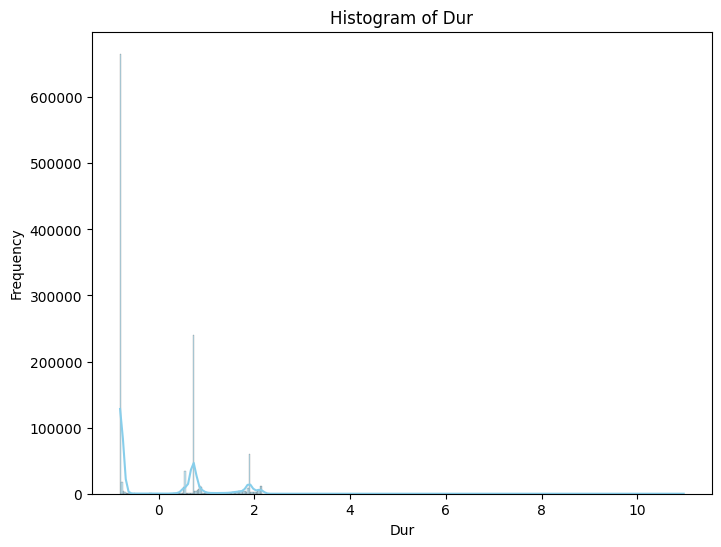

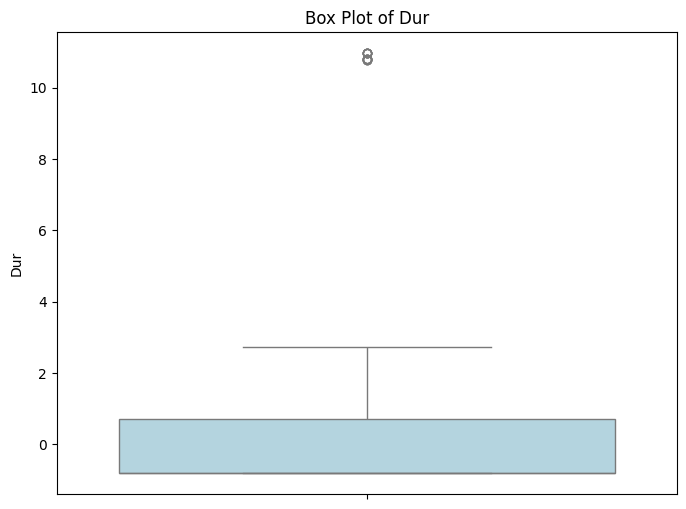

In [17]:
# Histogram and Density Plot for a single numerical feature
feature = 'Dur'
plt.figure(figsize=(8, 6))
sns.histplot(combinedDf[feature], kde=True, color='skyblue')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Box Plot for a single numerical feature
plt.figure(figsize=(8, 6))
sns.boxplot(y=combinedDf[feature], color='lightblue')
plt.title(f'Box Plot of {feature}')
plt.ylabel(feature)
plt.show()

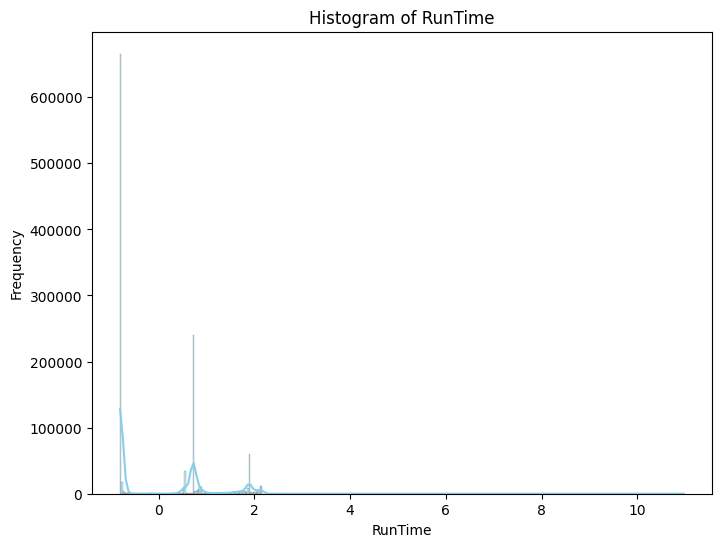

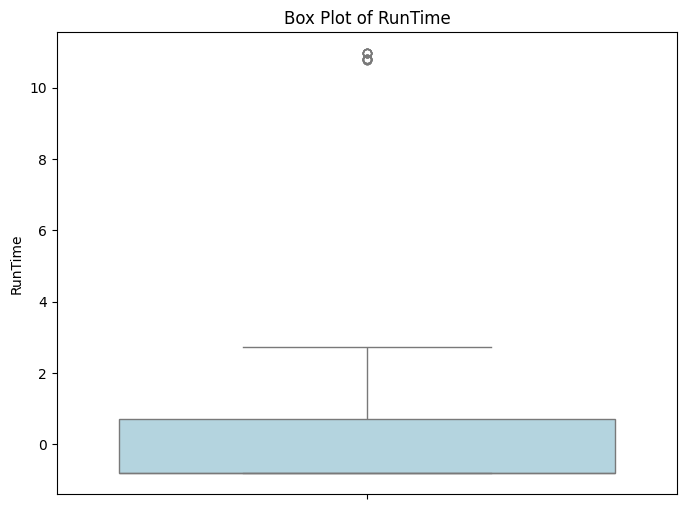

In [18]:
# Histogram and Density Plot for a single numerical feature
feature = 'RunTime'
plt.figure(figsize=(8, 6))
sns.histplot(combinedDf[feature], kde=True, color='skyblue')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Box Plot for a single numerical feature
plt.figure(figsize=(8, 6))
sns.boxplot(y=combinedDf[feature], color='lightblue')
plt.title(f'Box Plot of {feature}')
plt.ylabel(feature)
plt.show()

In [ ]:
# Histogram and Density Plot for a single numerical feature
feature = 'TotBytes'
plt.figure(figsize=(8, 6))
sns.histplot(combinedDf[feature], kde=True, color='skyblue')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Box Plot for a single numerical feature
plt.figure(figsize=(8, 6))
sns.boxplot(y=combinedDf[feature], color='lightblue')
plt.title(f'Box Plot of {feature}')
plt.ylabel(feature)
plt.show()

In [ ]:
# Histogram and Density Plot for a single numerical feature
feature = 'TotPkts'
plt.figure(figsize=(8, 6))
sns.histplot(combinedDf[feature], kde=True, color='skyblue')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Box Plot for a single numerical feature
plt.figure(figsize=(8, 6))
sns.boxplot(y=combinedDf[feature], color='lightblue')
plt.title(f'Box Plot of {feature}')
plt.ylabel(feature)
plt.show()

In [ ]:
# Histogram and Density Plot for a single numerical feature
feature = 'Load'
plt.figure(figsize=(8, 6))
sns.histplot(combinedDf[feature], kde=True, color='skyblue')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Box Plot for a single numerical feature
plt.figure(figsize=(8, 6))
sns.boxplot(y=combinedDf[feature], color='lightblue')
plt.title(f'Box Plot of {feature}')
plt.ylabel(feature)
plt.show()

In [ ]:
# Bar Plots for categorical features
categorical_features = combinedDf.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=combinedDf, x=feature, palette='Set2')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Pairwise Scatter Plots for numerical features
sns.pairplot(combinedDf[numerical_features])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combinedDf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
